In [1]:
!pip install tensorflow scikit-learn matplotlib numpy seaborn

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.2 MB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
     -------------------------------------- 110.1/110.1 kB 3.2 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\w10\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 122s 1us/step


C:\Users\w10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3014 - loss: 1.8707 - val_accuracy: 0.4975 - val_loss: 1.3888
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5176 - loss: 1.3417 - val_accuracy: 0.5575 - val_loss: 1.2309
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5767 - loss: 1.1861 - val_accuracy: 0.5893 - val_loss: 1.1435
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6218 - loss: 1.0735 - val_accuracy: 0.6203 - val_loss: 1.0745
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6592 - loss: 0.9855 - val_accuracy: 0.6446 - val_loss: 1.0120
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6825 - loss: 0.9083 - val_accuracy: 0.6699 - val_loss: 0.9454
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7025 - loss: 0.8542 - val_accuracy: 0.6766 - val_loss: 0.9386
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7203 - loss: 0.8012 - 

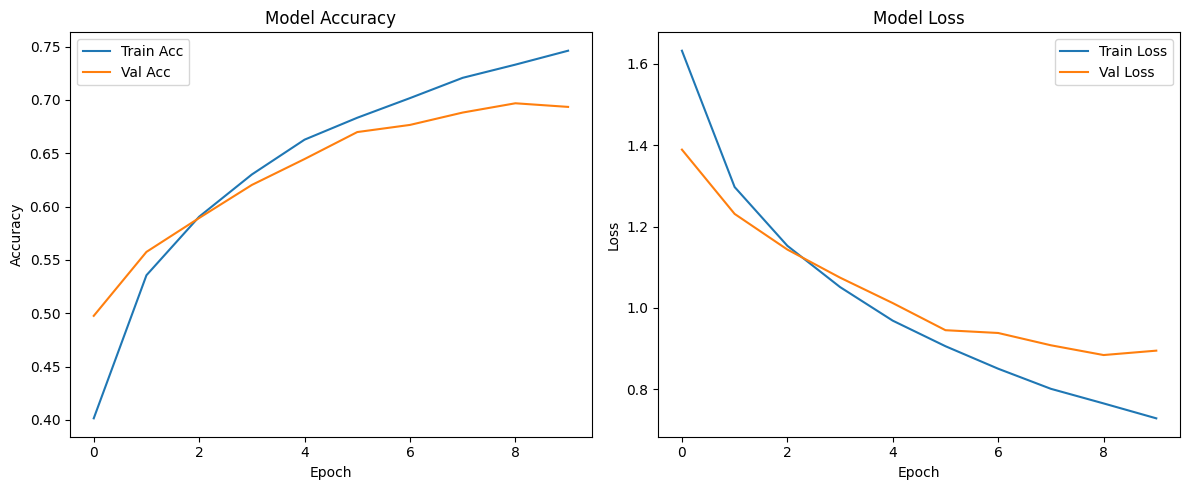

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 Classification Report:

              precision    recall  f1-score   support

    airplane       0.73      0.71      0.72      1000
  automobile       0.83      0.80      0.82      1000
        bird       0.53      0.61      0.57      1000
         cat       0.53      0.48      0.51      1000
        deer       0.57      0.75      0.65      1000
         dog       0.63      0.55      0.59      1000
        frog       0.73      0.81      0.76      1000
       horse       0.78      0.69      0.73      1000
        ship       0.79      0.81      0.80      1000
       truck       0.86      0.68      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



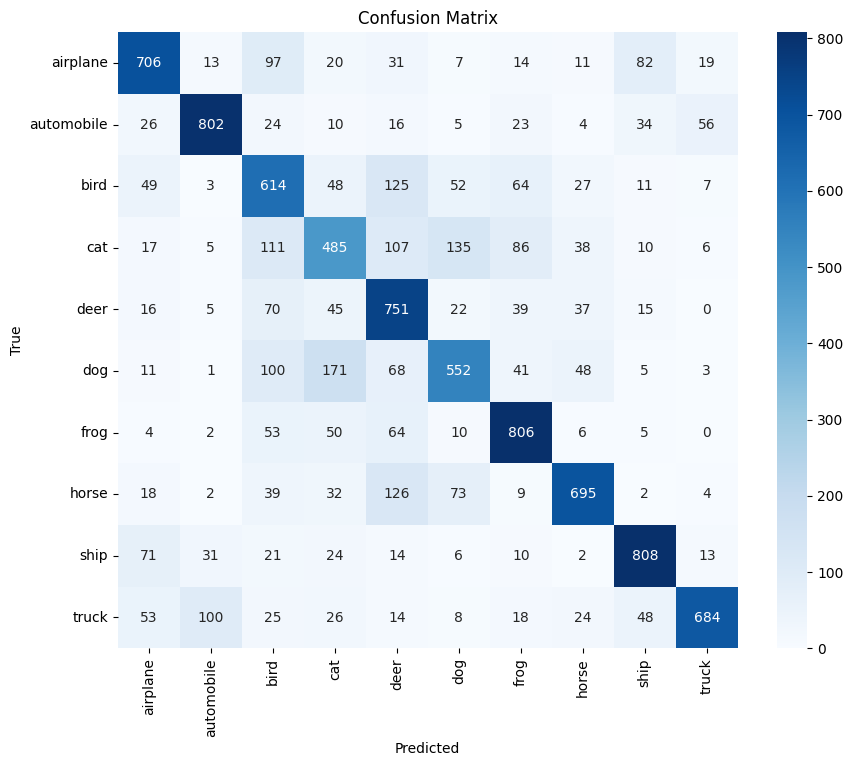

In [3]:

# Step 2: Load and Prepare the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step 3: Define Class Names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Step 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Step 6: Evaluate Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_acc:.4f}")

# Step 7: Plot Accuracy and Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Detailed Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
